<H1> Google Analytics Data Clustering
    <br><br>

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [142]:
analytics=pd.read_csv('analytics1b.csv')

In [143]:
analytics=analytics.drop(columns='Unnamed: 0')

In [144]:
analytics.columns =['Page', 'Pageviews', 'Uniquepageviews', 'Avgtime',
       'Entrances', 'Bouncerate', 'Exit', 'Pagevalue']

In [145]:
analytics.head(2)

,Page,Pageviews,Uniquepageviews,Avgtime,Entrances,Bouncerate,Exit,Pagevalue
0,home,57439,45889,134,38152,50.16,44.91,1.91
1,basket.html,27683,9092,45,1655,32.57,10.05,23.94


In [146]:
analytics.shape

(754, 8)

In [147]:
analytics.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Pageviews,754,518,2983,1,1,8,67,57439
Uniquepageviews,754,316,2015,1,1,7,61,45889
Avgtime,754,90,179,0,14,40,111,2323
Entrances,754,102,1419,0,0,1,6,38152
Bouncerate,754,25,33,0,0,0,50,100
Exit,754,19,23,0,0,13,25,100
Pagevalue,754,9,21,0,0,0,13,348


<br><br><br><br>
<h2> Feature Engineering and Cleaning

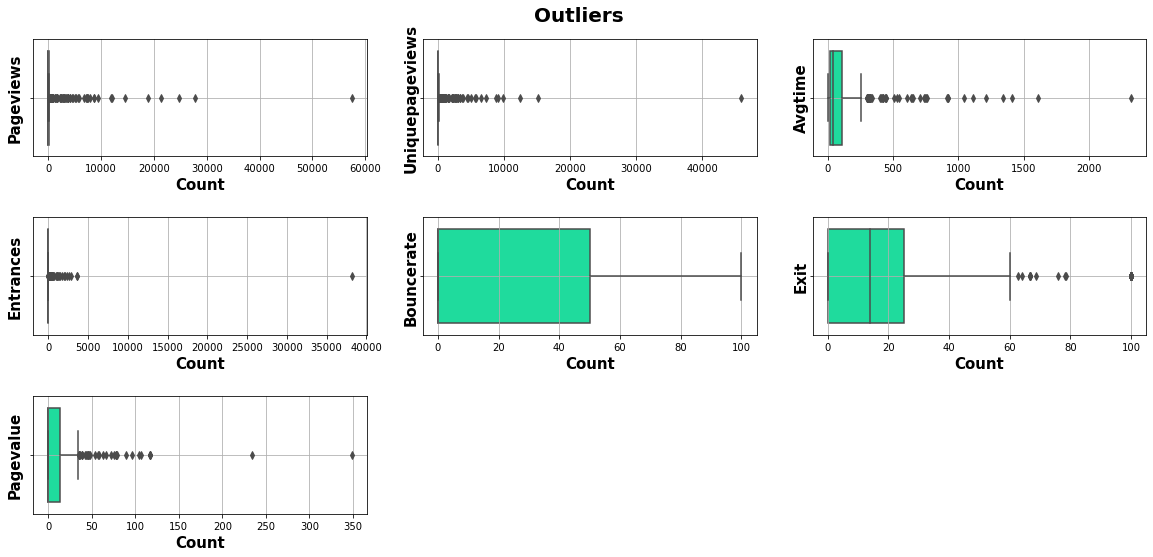

In [181]:
col=analytics.columns[1:]
counter=0
fig,axes=plt.subplots(3,3,sharey=True,figsize=(17, 8),)
fig.tight_layout(pad=4)
plt.suptitle('Outliers ', fontsize=20,color='black',fontweight='bold')
for i in range(3):
    #print(i)
    for i2 in range (3):
        if counter >=len(col):
            break
        sns.boxplot(analytics[col[counter]],ax=axes[i, i2],color='#00faa7')
        axes[i, i2].set_xlabel('Count', fontsize=15,color='black',fontweight='bold')
        axes[i, i2].set_ylabel(col[counter], fontsize=15,color='black',fontweight='bold')
        axes[i,i2].grid()
        counter+=1
axes[2,1].set_visible(False)
axes[2,2].set_visible(False)



In [134]:
analytics2=analytics.loc[(analytics['Pageviews']<=1000)]

In [135]:
analytics2=analytics2.loc[(analytics2['Pageviews']<=400)]

In [136]:
analytics2=analytics2.loc[(analytics2['Uniquepageviews']<=300)]

In [137]:
analytics2=analytics2.loc[(analytics2['Entrances']<=75)]

In [138]:
analytics2=analytics2.loc[(analytics2['Pagevalue']<=60)]

In [139]:
analytics2=analytics2.loc[(analytics2['Avgtime']<=500)]

In [140]:
analytics2=analytics2.loc[(analytics2['Exit']<=75)]

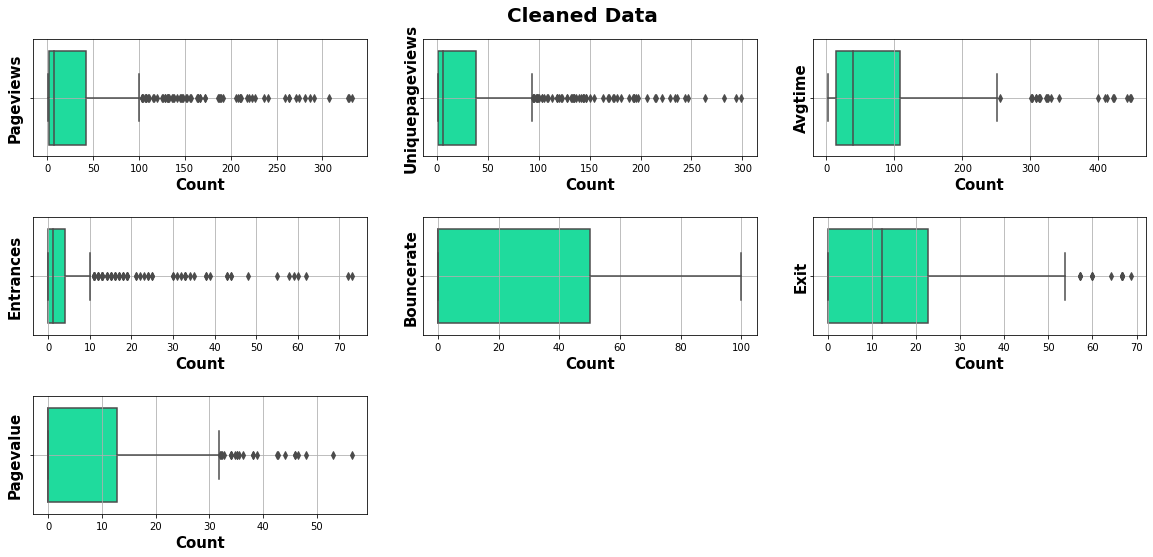

In [177]:
col=analytics2.columns[1:]
counter=0
fig,axes=plt.subplots(3,3,sharey=True,figsize=(17, 8),)
fig.tight_layout(pad=4)
plt.suptitle('Cleaned Data', fontsize=20,color='black',fontweight='bold')
for i in range(3):
    #print(i)
    for i2 in range (3):
        if counter >=len(col):
            break
        sns.boxplot(analytics2[col[counter]],ax=axes[i, i2],color='#00faa7')
        axes[i, i2].set_xlabel('Count', fontsize=15,color='black',fontweight='bold')
        axes[i, i2].set_ylabel(col[counter], fontsize=15,color='black',fontweight='bold')
        axes[i,i2].grid()
        counter+=1

axes[2,1].set_visible(False)
axes[2,2].set_visible(False)

In [150]:
analytics2.head(5)

,Page,Pageviews,Uniquepageviews,Avgtime,Entrances,Bouncerate,Exit,Pagevalue
70,google+sea+glass+bottle,332,294,56,44,50.00,22.59,22.77
71,quickview,329,143,12,0,0.00,15.20,0.70
72,supernatural+paper+backpack,328,299,58,43,60.47,22.26,11.13
73,google+black+cloud+polo,307,282,50,33,30.30,19.22,19.80
74,register.html,291,103,37,11,36.36,14.09,14.75


In [152]:
analytics2.shape,analytics.shape

((608, 8), (754, 8))

In [161]:
colors=['#ff7de5','#824bfa','#7dffab','#6b8dfa','#a96bfa','#d7fa4b','#fa824b']

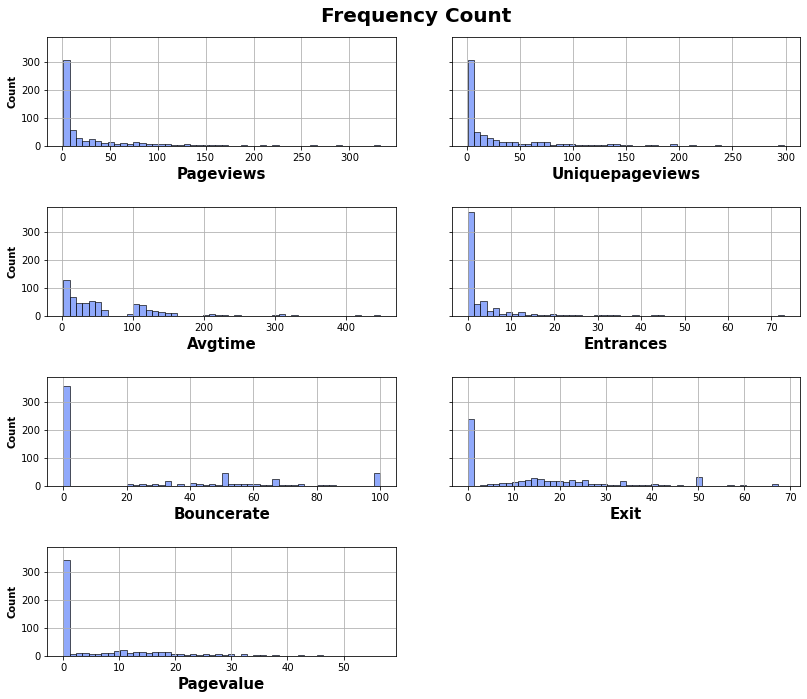

In [182]:
col=analytics2.columns[1:]
counter=0
fig,axes=plt.subplots(4,2,sharey=True,figsize=(12, 10),)
fig.tight_layout(pad=4)
plt.suptitle('Frequency Count', fontsize=20,color='black',fontweight='bold')
for i in range(4):
    #print(i)
    for i2 in range (2):
        if counter >=len(col):
            break
        sns.histplot(analytics2[col[counter]],ax=axes[i, i2],color='#6b8dfa',bins=50)
        axes[i, i2].set_ylabel('Count', fontsize=10,color='black',fontweight='bold')
        axes[i, i2].set_xlabel(col[counter], fontsize=15,color='black',fontweight='bold')
        axes[i,i2].grid()
        counter+=1
        
axes[3,1].set_visible(False)


<br><br>
<h1> EDA - Exploratory Data Analysis

In [261]:
sort_data= analytics2.sort_values(by='Pageviews',ascending=False)

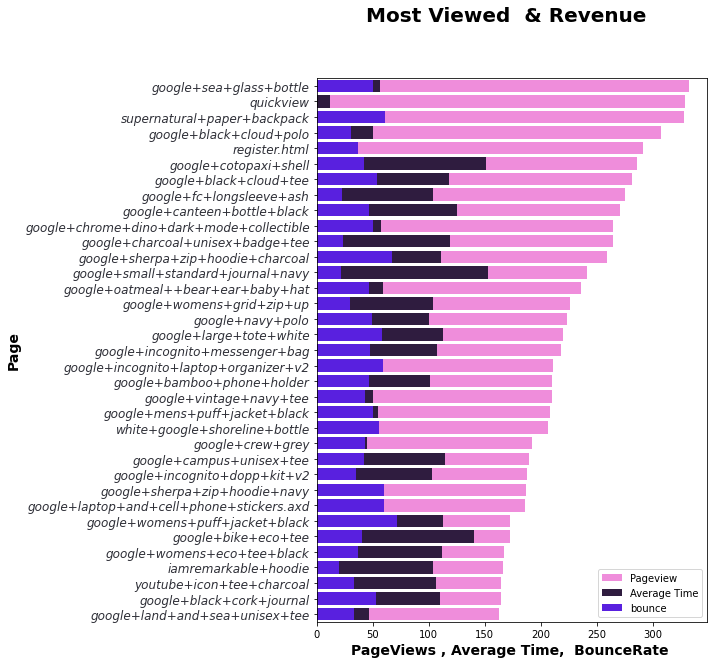

In [262]:
plt.figure(figsize=(7,10))
ax=sns.barplot(x=sort_data.Pageviews[:35], y=sort_data.Page[:35], data=sort_data,
            color='#ff7de5',label="Pageview")
ax=sns.barplot(x=sort_data.Avgtime[:35], y=sort_data.Page[:35], data=sort_data,
             color='#301645', label="Average Time")
ax=sns.barplot(x=sort_data.Bouncerate[:35], y=sort_data.Page[:35], data=sort_data,
             color='#4c00ff', label="bounce")
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12,color='#2f3038',fontstyle='italic' ,label="revenue")
plt.suptitle('Most Viewed  & Revenue', fontsize=20,color='black',fontweight='bold')
plt.xlabel('PageViews , Average Time,  BounceRate ', fontsize=14,color='black',fontweight='bold')
plt.ylabel('Page', fontsize=14,color='black',fontweight='bold')
plt.legend()
plt.show()

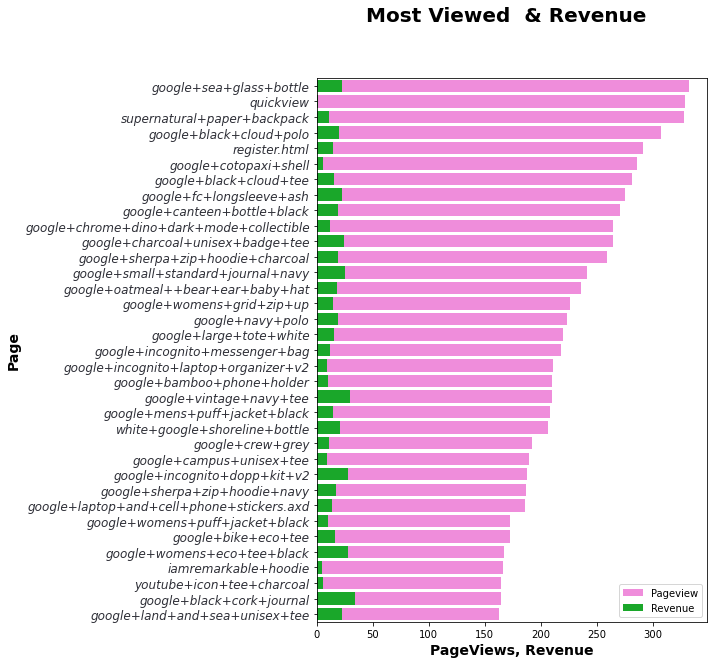

In [263]:
plt.figure(figsize=(7,10))
ax=sns.barplot(x=sort_data.Pageviews[:35], y=sort_data.Page[:35], data=sort_data,
            color='#ff7de5',label="Pageview")
ax=sns.barplot(x=sort_data.Pagevalue[:35], y=sort_data.Page[:35], data=sort_data,
             color='#02bf18', label="Revenue")
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12,color='#2f3038',fontstyle='italic' ,label="revenue")
plt.suptitle('Most Viewed  & Revenue', fontsize=20,color='black',fontweight='bold')
plt.xlabel('PageViews, Revenue', fontsize=14,color='black',fontweight='bold')
plt.ylabel('Page', fontsize=14,color='black',fontweight='bold')
plt.legend()
plt.show()

In [264]:
sort_data= analytics2.sort_values(by='Pagevalue',ascending=False)

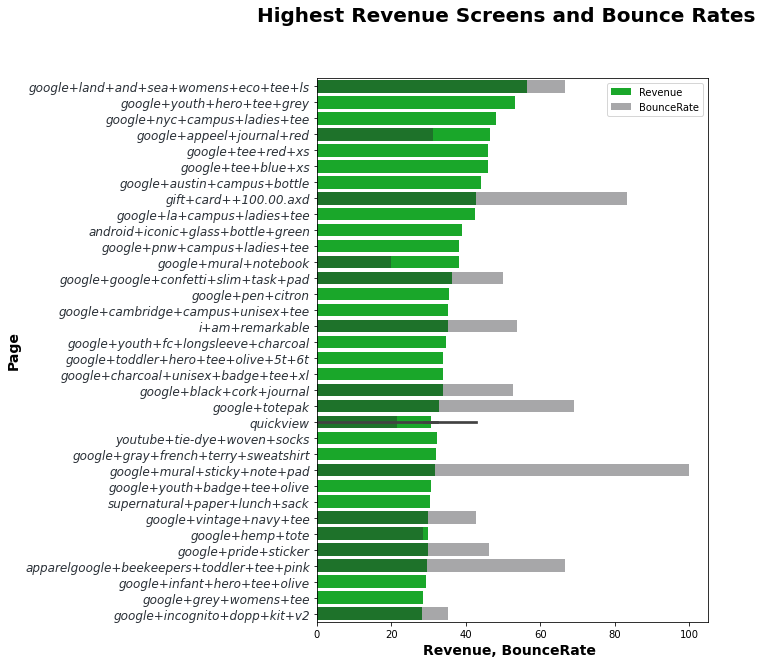

In [265]:
plt.figure(figsize=(7,10))
ax=sns.barplot(x=sort_data.Pagevalue[:35], y=sort_data.Page[:35], data=sort_data,
             color='#02bf18',label="Revenue")
ax=sns.barplot(x=sort_data.Bouncerate[:35], y=sort_data.Page[:35], data=sort_data,
             color='#24232b' ,alpha=.4,label="BounceRate")
#ax=sns.barplot(x=sort_data.Avgtime[:35], y=sort_data.Page[:35], data=sort_data,
             #color='yellow' ,label="Average Time")
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12, color='#2b3138',fontstyle='italic')
plt.suptitle('Highest Revenue Screens and Bounce Rates', fontsize=20,color='black',fontweight='bold')
plt.xlabel('Revenue, BounceRate ', fontsize=14,color='black',fontweight='bold')
plt.ylabel('Page', fontsize=14,color='black',fontweight='bold')
#plt.grid(axis='x')
plt.legend()
plt.show()

In [287]:
#Check relationship between PageViews and Value

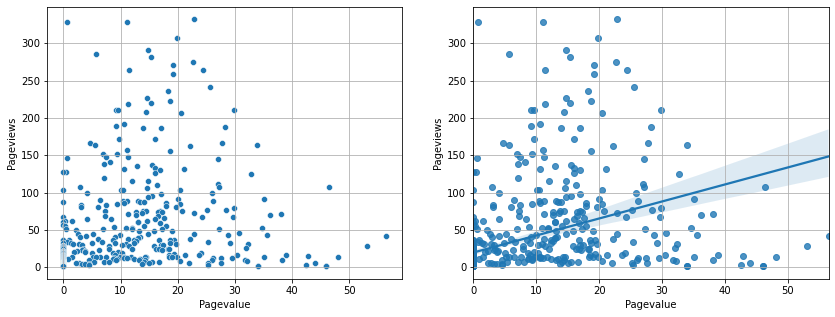

In [288]:
fig,axes =plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(y=analytics2['Pageviews'], x=analytics2['Pagevalue'], ax=axes[0])
sns.regplot(y=analytics2['Pageviews'], x=analytics2['Pagevalue'], data=analytics2, ax=axes[1])
axes[0].grid(),axes[1].grid()
plt.show()

Text(0.5, 1.0, 'histogram of PageViews')

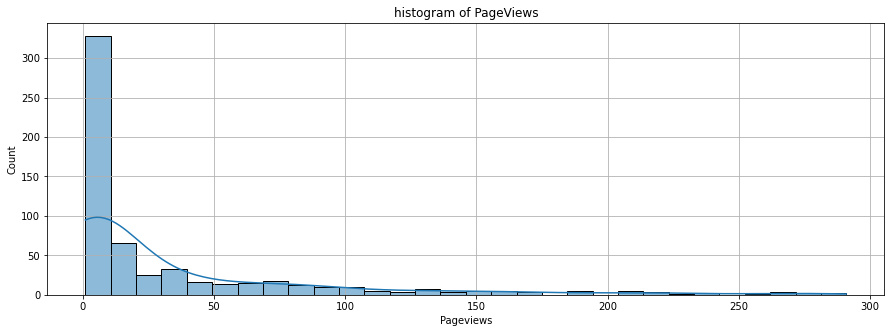

In [291]:
plt.figure(figsize=(15,5))
sns.histplot(analytics2['Pageviews'].loc[analytics2['Pageviews']<=300],bins=30,kde=True)
plt.grid(axis='both',alpha=1)
#plt.xticks([i for i in range(0,2500,100)])
plt.title('histogram of PageViews')

<br><br>
<h2> Clustering

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [300]:
scg= StandardScaler()

In [301]:
analytics2_scaled= scg.fit_transform(analytics2.iloc[:,1:])

In [302]:
analytics2_scaled = pd.DataFrame(analytics2_scaled)

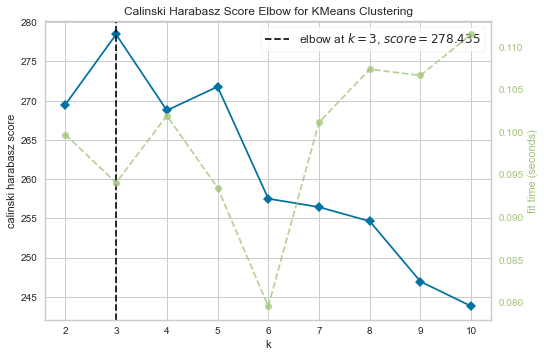

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [303]:
Elbow_M = KElbowVisualizer(KMeans(), k=10,metric='calinski_harabasz')
#Elbow_M = KElbowVisualizer(KMeans(), k=10,metric='silhouette')
Elbow_M.fit(analytics2_scaled)
Elbow_M.show()

In [304]:
AC = AgglomerativeClustering(n_clusters=3)

In [305]:
yhat_Analytics = AC.fit_predict(analytics2_scaled)

In [306]:
analytics2['Clusters']=yhat_Analytics

In [308]:
pd.pivot_table(analytics2,index='Clusters', aggfunc='mean')

,Avgtime,Bouncerate,Entrances,Exit,Pagevalue,Pageviews,Uniquepageviews
Clusters,,,,,,,
0,96.468401,46.726394,4.743494,24.837026,11.903197,42.594796,37.843866
1,38.785235,0.206946,0.352349,3.788322,2.076644,8.607383,7.063758
2,85.512195,49.530488,32.024390,26.576829,11.612683,188.536585,160.707317


In [544]:
pd.pivot_table(analytics2[['Pagevalue','Pageviews','Clusters']],index='Clusters', aggfunc='mean')

,Pagevalue,Pageviews
Clusters,,
0,11.903197,42.594796
1,2.076644,8.607383
2,11.612683,188.536585


In [553]:
analytics3=analytics2.copy()

In [556]:
analytics3['Clusters'] =analytics3['Clusters'].replace({0:"Popular and Commonly Purchased ",1:"Not selling so much",2:"Most Viewed and Sold"})

No handles with labels found to put in legend.


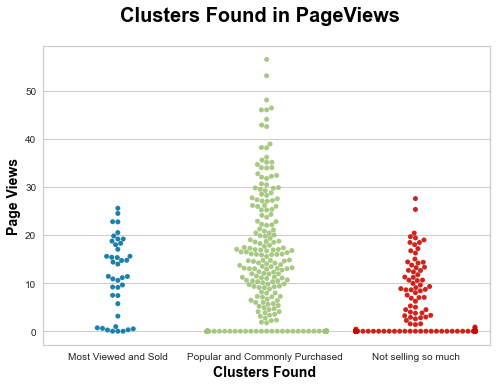

In [561]:
sns.swarmplot(x=analytics3["Clusters"], y=analytics2["Pagevalue"], alpha=0.9, cmap="Set1" )
plt.suptitle('Clusters Found in PageViews', fontsize=20,color='black',fontweight='bold')
plt.xlabel('Clusters Found ', fontsize=14,color='black',fontweight='bold')
plt.ylabel('Page Views', fontsize=14,color='black',fontweight='bold')
plt.legend()
plt.show()

In [551]:
print('Cluster 0 is "Popular and Commonly Purchased " \n \
Cluster 1 is "Not selling so much"\n \
Cluster 2 is "Most Viewed and Sold \n"'
)

Cluster 0 is "Popular and Commonly Purchased " 
 Cluster 1 is "Not selling so much"
 Cluster 2 is "Most Viewed and Sold 
"


<h2>Cluster 0 is "Popular and Commonly Purchased " <br>
Cluster 1 is "Not selling so much"<br>
Cluster 2 is "Most Viewed and Sold" <br>

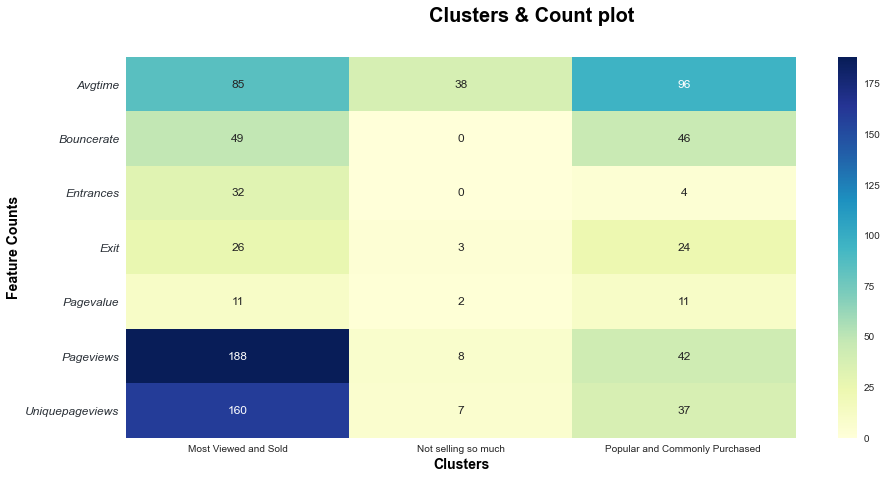

In [557]:
plt.figure(figsize=(15,7))
ax=sns.heatmap(pd.pivot_table(analytics3,index='Clusters', aggfunc='mean').astype(int).T,\
            annot=True,fmt="d",cmap="YlGnBu")
plt.suptitle('Clusters & Count plot', fontsize=20, color='black',fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12, color='#2b3138',fontstyle='italic',rotation=0)
plt.xlabel('Clusters', fontsize=14,color='black',fontweight='bold')
plt.ylabel('Feature Counts', fontsize=14,color='black',fontweight='bold')
#plt.legend()
plt.show()

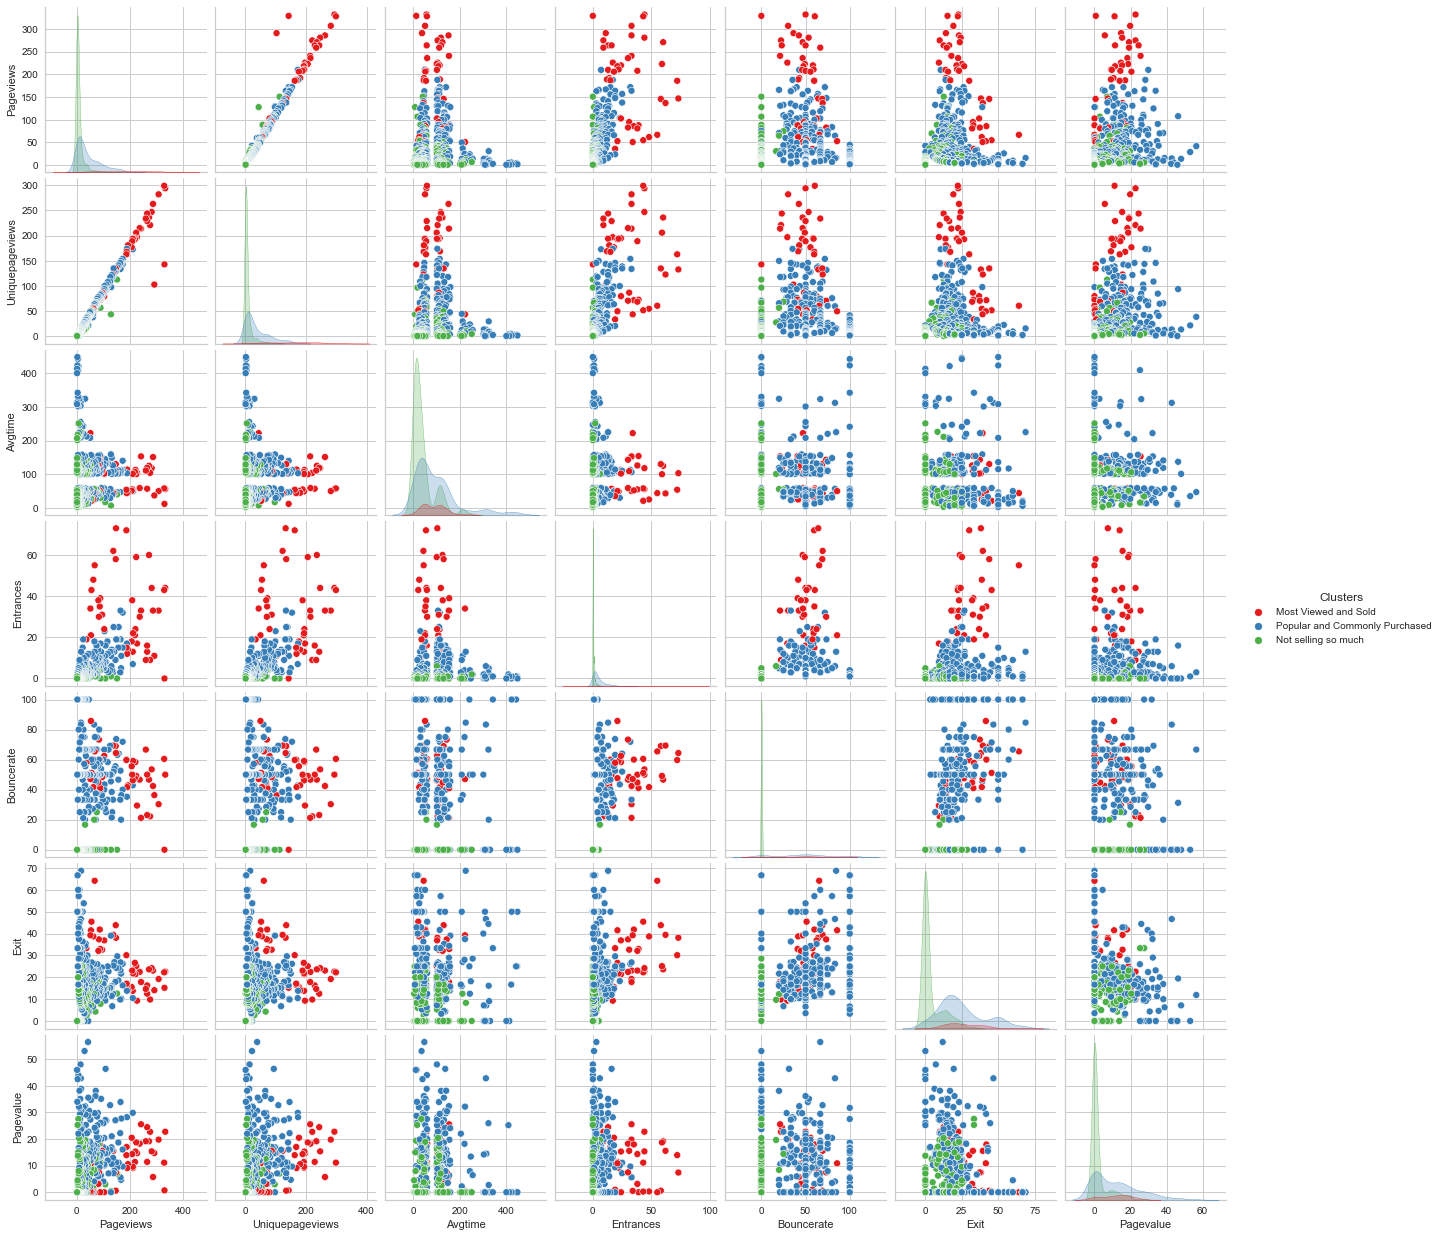

In [558]:
sns.pairplot(analytics3, hue='Clusters', palette='Set1')

<AxesSubplot:xlabel='Avgtime', ylabel='Pageviews'>

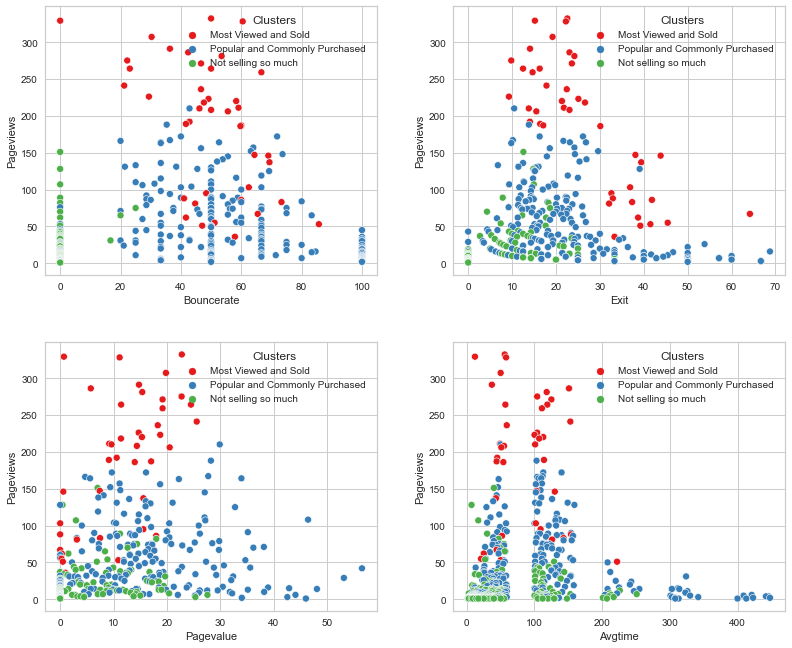

In [560]:
fig,axes=plt.subplots(2,2,figsize=(12, 10),sharey=False,sharex=False)
fig.tight_layout(pad=4)
sns.scatterplot(analytics3.Bouncerate,analytics3.Pageviews,hue=analytics3['Clusters'],palette='Set1'\
               ,ax=axes[0, 0])

sns.scatterplot(analytics3.Exit,analytics3.Pageviews,hue=analytics3['Clusters'],palette='Set1'\
               ,ax=axes[0, 1])

sns.scatterplot(analytics3.Pagevalue,analytics3.Pageviews,hue=analytics3['Clusters'],palette='Set1'\
               ,ax=axes[1, 0])

sns.scatterplot(analytics3.Avgtime,analytics3.Pageviews,hue=analytics3['Clusters'],palette='Set1'\
              , ax=axes[1, 1])



<br><br>
<h1> Analysis of the Clusters

In [377]:
a1=analytics2.loc[analytics2['Clusters']==1]

In [378]:
a0=analytics2.loc[analytics2['Clusters']==0]

In [379]:
a2=analytics2.loc[analytics2['Clusters']==2]

In [380]:
a1.shape,a0.shape,a2.shape

((298, 9), (269, 9), (41, 9))

# Cluster 0  is  "Popular and Commonly Purchased "

In [473]:
top.Pagevalue.mean(),top.Pageviews.mean()

(17.12775, 133.225)

In [475]:
a0[['Page','Pageviews','Pagevalue']].describe()

,Pageviews,Pagevalue
count,269.000000,269.000000
mean,42.594796,11.903197
std,46.476797,12.737213
min,1.000000,0.000000
25%,5.000000,0.000000
50%,24.000000,9.820000
75%,70.000000,18.650000
max,210.000000,56.500000


In [474]:
top.shape

(40, 3)

In [471]:
top=a0[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:40]

In [472]:
a0[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:10]

,Page,Pageviews,Pagevalue
92,google+vintage+navy+tee,210,29.87
100,google+incognito+dopp+kit+v2,188,28.22
103,google+bike+eco+tee,172,16.07
104,google+womens+puff+jacket+black,172,9.68
105,google+womens+eco+tee+black,167,27.72
106,iamremarkable+hoodie,166,4.68
107,youtube+icon+tee+charcoal,164,5.60
108,google+black+cork+journal,164,33.93
109,google+land+and+sea+unisex+tee,163,22.22
110,google+bot+multicolored,157,11.12


# Cluster 1 is "Not selling so much"

In [467]:
top1.Pagevalue.mean(),top1.Pageviews.mean()

(7.711599999999999, 38.12)

In [468]:
top1.shape

(50, 3)

In [469]:
a1[['Page','Pageviews','Pagevalue']].describe()

,Pageviews,Pagevalue
count,298.000000,298.000000
mean,8.607383,2.076644
std,18.279265,4.962076
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,151.000000,27.570000


In [465]:
top1= a1[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:50]

In [517]:
a1[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:10]

,Page,Pageviews,Pagevalue
113,myaccount.html?mode=shippingaddress,151,7.00
126,quickview,128,0.44
138,myaccount.html?mode=activities,107,2.95
155,myaccount.html?mode=customerinfo,89,11.20
165,google+womens+tech+fleece+grey,82,17.99
175,google+youth+fc+zip+hoodie,75,14.40
184,google+red+speckled+tee,70,12.62
194,google+google+striped+penny+pouch,65,8.39
196,candy+cane+android+cardboard+sculpture,62,1.54
208,google+sherpa+zip+hoodie+navy+xs,54,8.85


# Cluster 2 is "Most Viewed and Sold "

In [459]:
top3.Pagevalue.mean(),top3.Pageviews.mean()

(13.97, 232.43333333333334)

In [450]:
top3.shape

(30, 3)

In [458]:
a2[['Page','Pageviews','Pagevalue']].describe()

,Pageviews,Pagevalue
count,41.000000,41.000000
mean,188.536585,11.612683
std,89.281324,7.783909
min,36.000000,0.000000
25%,95.000000,5.730000
50%,208.000000,11.410000
75%,264.000000,17.970000
max,332.000000,25.560000


In [455]:
top3=a2[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:30]

In [456]:
a2[['Page','Pageviews','Pagevalue']].sort_values(by='Pageviews',ascending=False)[:10]

,Page,Pageviews,Pagevalue
70,google+sea+glass+bottle,332,22.77
71,quickview,329,0.70
72,supernatural+paper+backpack,328,11.13
73,google+black+cloud+polo,307,19.80
74,register.html,291,14.75
76,google+cotopaxi+shell,286,5.73
77,google+black+cloud+tee,281,15.37
78,google+fc+longsleeve+ash,275,22.73
79,google+canteen+bottle+black,271,19.17
82,google+chrome+dino+dark+mode+collectible,264,11.41


In [511]:
print('CLUSTER 2 = Most Viewed and Sold ')
print("Page value Mean",top3.Pagevalue.mean(),"Page Views Mean",top3.Pageviews.mean())

CLUSTER 2 = Most Viewed and Sold 
Page value Mean 13.97 Page Views Mean 232.43333333333334


In [506]:
print('CLUSTER 1 = Not selling so much')
print("Page value Mean",top1.Pagevalue.mean(),"Page Views Mean",top1.Pageviews.mean())

CLUSTER 1 = Not selling so much
Page value Mean 7.711599999999999 Page Views Mean 38.12


In [512]:
print('CLUSTER 0 = Popular and Commonly Purchased ')
print("Page value Mean",top.Pagevalue.mean(),"Page Views Mean",top.Pageviews.mean())

CLUSTER 0 = Popular and Commonly Purchased 
Page value Mean 17.12775 Page Views Mean 133.225


In [527]:
clust=analytics2.describe()

CLUSTER 2 = Most Viewed and Sold 
Page value Mean 17.12775 Page Views Mean 133.225


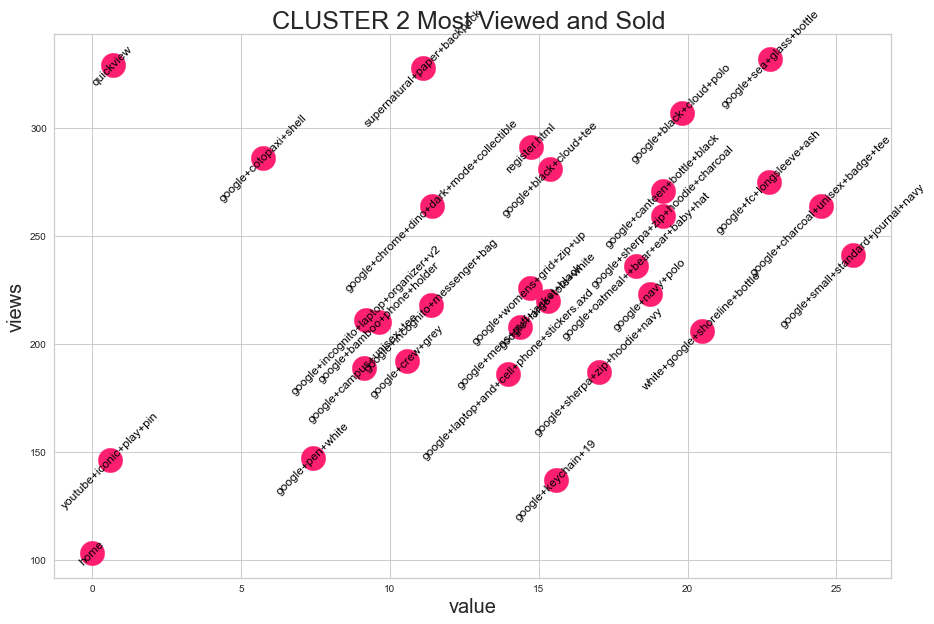

In [567]:
print('CLUSTER 2 = Most Viewed and Sold ')
print("Page value Mean",top.Pagevalue.mean(),"Page Views Mean",top.Pageviews.mean())

plt.figure(figsize=(15,10))
plt.scatter(top3.Pagevalue,top3.Pageviews,c='#ff1f71',s=600)
for i in range(0,top3.shape[0],1):
    plt.text(x=top3.Pagevalue.iloc[i],y=top3.Pageviews.iloc[i],s=top3.Page.iloc[i] ,c='black',\
            rotation=45, ha='center', va='center',fontsize=12)
plt.xlabel('value',fontsize=20)
plt.ylabel('views',fontsize=20)
plt.title('CLUSTER 2 Most Viewed and Sold ',fontsize=25)
plt.show()

CLUSTER 0 = Popular and Commonly Purchased 
Page value Mean 17.12775 Page Views Mean 133.225


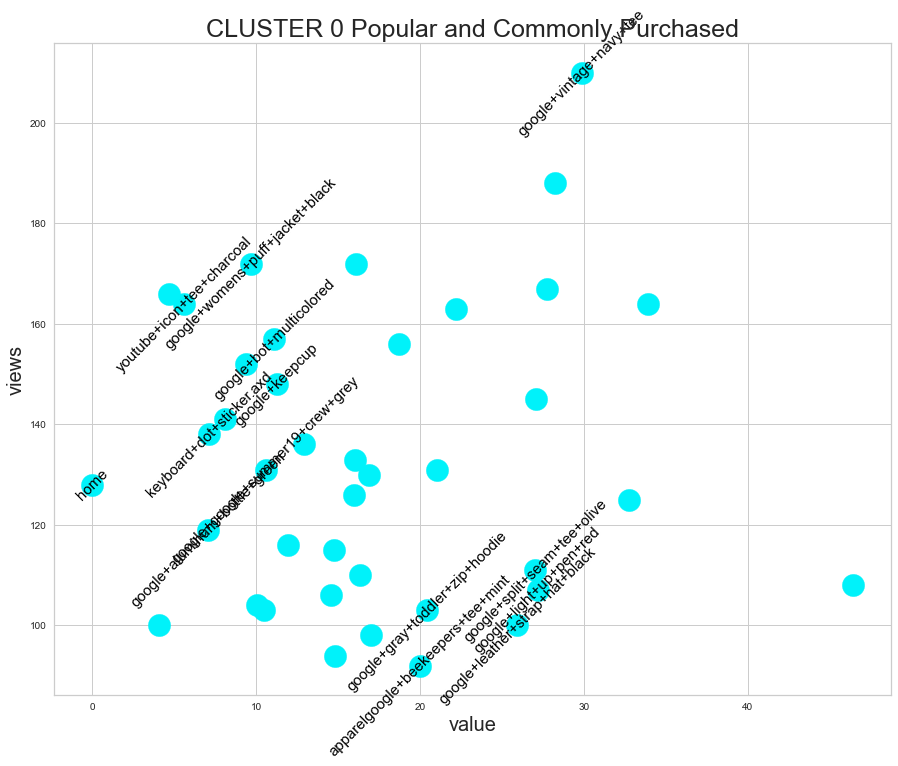

In [564]:
print('CLUSTER 0 = Popular and Commonly Purchased ')
print("Page value Mean",top.Pagevalue.mean(),"Page Views Mean",top.Pageviews.mean())

plt.figure(figsize=(15,12))
plt.scatter(top.Pagevalue,top.Pageviews,c='#00f2fa',s=500)
for i in range(0,top.shape[0],3):
    plt.text(x=top.Pagevalue.iloc[i],y=top.Pageviews.iloc[i],s=top.Page.iloc[i] ,c='black',\
            rotation=45, ha='center', va='center',fontsize=15)
plt.xlabel('value',fontsize=20)
plt.ylabel('views',fontsize=20)
plt.title('CLUSTER 0 Popular and Commonly Purchased',fontsize=25)

plt.show()
    

CLUSTER 1 = Not selling so much
Page value Mean 7.711599999999999 Page Views Mean 38.12


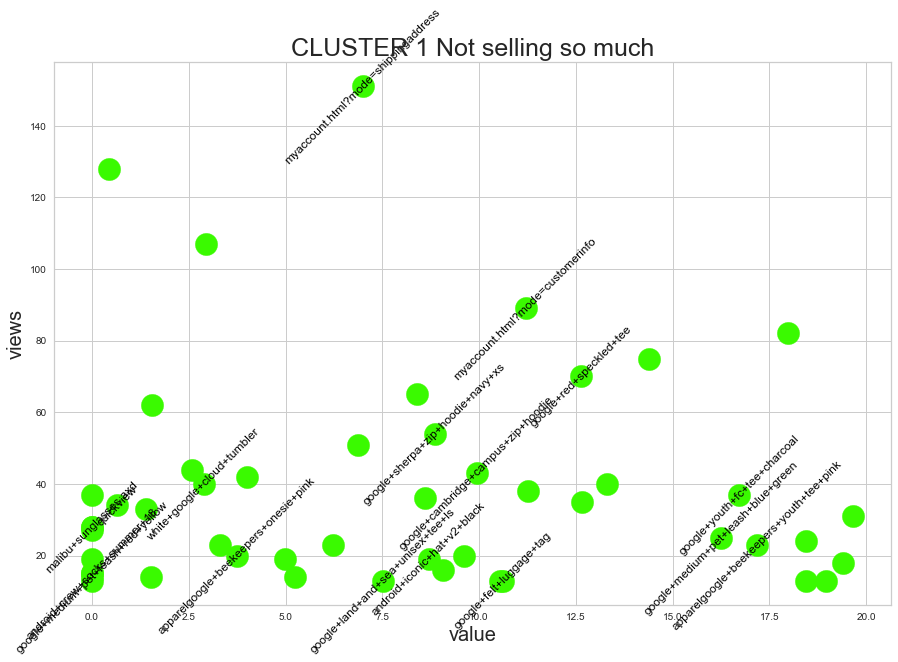

In [565]:
print('CLUSTER 1 = Not selling so much')
print("Page value Mean",top1.Pagevalue.mean(),"Page Views Mean",top1.Pageviews.mean())
plt.figure(figsize=(15,10))
plt.scatter(top1.Pagevalue,top1.Pageviews,c='#3afa00',s=500)
for i in range(0,top1.shape[0],3):
    plt.text(x=top1.Pagevalue.iloc[i],y=top1.Pageviews.iloc[i],s=top1.Page.iloc[i] ,c='black',\
            rotation=45, ha='center', va='center',fontsize=12)
plt.xlabel('value',fontsize=20)
plt.ylabel('views',fontsize=20)
plt.title('CLUSTER 1 Not selling so much',fontsize=25)
plt.show()

<h2> List of Most Viewed Pages with Clusters

In [400]:
sort_data= analytics2.sort_values(by='Pageviews',ascending=False)

In [446]:
sort_data[['Page','Clusters']][:60]

,Page,Clusters
70,google+sea+glass+bottle,2
71,quickview,2
72,supernatural+paper+backpack,2
73,google+black+cloud+polo,2
74,register.html,2
76,google+cotopaxi+shell,2
77,google+black+cloud+tee,2
78,google+fc+longsleeve+ash,2
79,google+canteen+bottle+black,2
82,google+chrome+dino+dark+mode+collectible,2
